 **DETALLES DE LOS DATOS UTILIZADOS PARA ESTE ANÁLISIS**

Los datos son anuales y pertenecen a los años 1990 al 2022.
Los datos de Energía (MWh), Demanda Máxima (MW) corresponde a datos proveidos por la ANDE (No disponibilizado en la web).
Los datos de Números de clientes (ANDE), corresponde a datos descargados de la web.
Los datos historicos de Población corresponde a datos disponibiliados en la web del INE.
Los datos de PIB per cápita corresponde a datos del BCP disponibilizados en la web.
Los datos de la Inflación, precios al consumidor (% anual) pertenece a datos disponibilizados en la pág. web del Banco Mundial.
Los datos de Temperatura Horaria promedio corresponde a datos del año 2022 (8760 observaciones) descargados de la pág. web de la NASA. Los datos de Demanda máxima horaria corrsponde a datos proveidos por la ANDE (no disponibilizados en la web).

#***1. Análisis de Regresión Lineal Múltiple (RLM)***


In [ ]:
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [ ]:
datos_2 = pd.read_excel("/content/Autocorrelación (1990-2022).xlsx")

In [ ]:
datos_2.head()

,Año,Energía,Población,PIB,Inflación
0,1990-01-01,2168810.554,4138000.0,4396.133529,37.259956
1,1991-01-01,2416004.654,4406000.0,4434.904857,24.225352
2,1992-01-01,2721060.773,4496000.0,4398.755098,15.192744
3,1993-01-01,3139141.460,4588000.0,4504.499905,18.208661
4,1994-01-01,3613046.176,4681000.0,4632.338844,20.566195


In [ ]:
datos_2.describe()

,Año,Energía,Población,PIB,Inflación
count,33.00000,3.300000e+01,3.300000e+01,33.000000,33.000000
mean,2006.00000,9.229597e+06,5.867128e+06,5204.657415,9.233133
std,9.66954,5.267944e+06,9.620326e+05,806.577994,7.396214
min,1990.00000,2.168811e+06,4.138000e+06,4281.883939,1.767516
25%,1998.00000,5.221021e+06,5.075000e+06,4504.499905,4.086823
50%,2006.00000,7.701304e+06,5.877323e+06,4834.871453,7.268060
75%,2014.00000,1.345030e+07,6.657232e+06,6021.288635,10.510242
max,2022.00000,1.963461e+07,7.453695e+06,6599.615022,37.259956


In [ ]:
formula = "Energía ~ Población + PIB + Inflación"
model = smf.ols(formula, data=datos_2)

In [ ]:
result= model.fit()

**1.1 Resumen estadistico**

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Energía   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     942.6
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           5.46e-29
Time:                        14:43:20   Log-Likelihood:                -481.33
No. Observations:                  33   AIC:                             970.7
Df Residuals:                      29   BIC:                             976.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.669e+07   1.05e+06    -25.507      0.000   -2.88e+07   -2.46e+07
Población      4.0618      0.284     14.322      0.000       3.482       4.642
PIB         2214.9108    272.772      8.120      0.000    1657.030    2772.792
Inflación   6.086e+04   2.09e+04      2.908      0.007    1.81e+04    1.04e+05
==============================================================================
Omnibus:                        0.611   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.625
Skew:                           0.290   Prob(JB):                        0.732
Kurtosis:                       2.657   Cond. No.                     6.41e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
result.params

Intercept   -2.669114e+07
Población    4.061776e+00
PIB          2.214911e+03
Inflación    6.085959e+04
dtype: float64

In [ ]:
import numpy as np
params = result.params
# Convertir a enteros
params_int = params.astype(int)
# Verificar que ahora son enteros
print(params_int, type(params_int[0]))

Intercept   -26691137
Población           4
PIB              2214
Inflación       60859
dtype: int64 <class 'numpy.int64'>


***1.2 Verificamos si existe MULTICOLINEALIDAD***

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X= dmatrices("Energía ~ Población + PIB + Inflación", datos_2, return_type="dataframe")
vif= pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["variables"]= X.columns
vif.round(3)

,VIF,variables
0,116.236,Intercept
1,7.662,Población
2,4.983,PIB
3,2.467,Inflación


***1.3  Gráficamos los residuos***

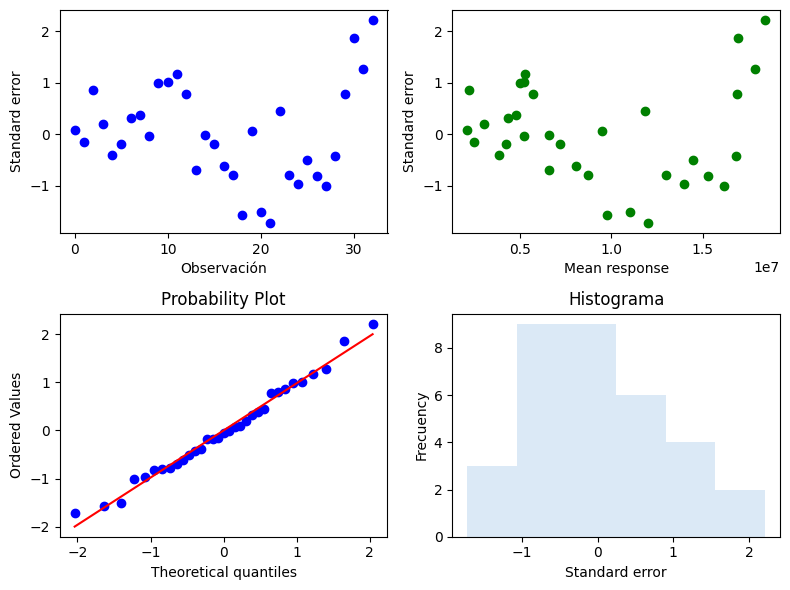

In [ ]:
fig= plt.figure(figsize= (8, 6))
ax = fig.add_subplot(221)
ax.scatter(np.arange(len(datos_2)), result.resid_pearson, color="blue")
ax.set_xlabel("Observación")
ax.set_ylabel("Standard error")
ax = fig.add_subplot(222)
ax.scatter(result.fittedvalues, result.resid_pearson, color= "green")
ax.set_xlabel("Mean response")
ax.set_ylabel("Standard error")
ax = fig.add_subplot(223)
st.probplot(result.resid_pearson, plot=ax)
ax = fig.add_subplot(224)
ax.hist(result.resid_pearson, bins=6)
ax.set_xlabel("Standard error")
ax.set_ylabel("Frecuency")
ax.set_title("Histograma")
plt.tight_layout()

***1.4 Prueba de Heterocedasticidad***

In [ ]:
from statsmodels.stats.diagnostic import het_white
white_test= het_white(result.resid, result.model.exog)
labels = ("LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value")
print(dict(zip(labels, white_test)))

{'LM Statistic': 22.655540503058507, 'LM-Test p-value': 0.003835819756673269, 'F-Statistic': 6.570340531496204, 'F-Test p-value': 0.00014743481518450394}


Dado que el **LM-Test p-value': 0.003835819756673269** al ser caercano a cero se recha la hipotesis nula y se acepta que existe heterocedasticidad.

***1.5 Prueba de Normalidad***

*Prob(JB):	0.732*, entonces se concluye lo siguiente:

"La prueba de Jarque-Bera sobre los residuos da un p-valor de 0.732, por lo que no se rechaza la hipótesis nula de normalidad con un nivel de significancia del 5%. Sin embargo, esto no confirma que los residuos se distribuyan normalmente, solo que no hay evidencia suficiente para rechazar la normalidad según esta prueba".

***1.6 Prueba de Durbin- Watson***

*Durbin-Watson:	0,801*

Los límites para interpretar el estadístico de Durbin-Watson son:

Entre 0 y 1.473 aproximadamente: Indica autocorrelación positiva
Entre 1.473 y 1,763 aproximadamente: No hay autocorrelación
Mayor 1,763:  Indica autocorrelación negativa
Tomando un nivel de significancia del 5%, los valores típicos son:

Para un valor de Durbin-Watson de 0.801:

Está por debajo del límite inferior de 1.473
Indica autocorrelación positiva fuerte
Rechazamos la hipótesis nula de no autocorrelación

In [ ]:
datos_2.head()

,Energía,Población,PIB,Inflación
0,2168810.554,4138000.0,4396.133529,37.259956
1,2416004.654,4406000.0,4434.904857,24.225352
2,2721060.773,4496000.0,4398.755098,15.192744
3,3139141.460,4588000.0,4504.499905,18.208661
4,3613046.176,4681000.0,4632.338844,20.566195


***1.7  Se define el MODELO  REGRESIÓN LINEAL MÚLTIPLE***

In [ ]:
# Definir modelo
model = smf.ols("Energía ~ Población + PIB + Inflación", data=datos_2).fit()
# Obtener parámetros
params = model.params

In [ ]:
print(params)

Intercept   -2.669114e+07
Población    4.061776e+00
PIB          2.214911e+03
Inflación    6.085959e+04
dtype: float64


In [ ]:
Población = datos_2['Población']
PIB = datos_2['PIB']
Inflación = datos_2['Inflación']
y = params[0] + params[1]*Población + params[2]*PIB + params[3]*Inflación

In [ ]:
# Generar predicciones
Población_pred = datos_2['Población']
PIB_pred = datos_2['PIB']
Inflación_pred = datos_2['Inflación']

In [ ]:
y_pred = params[0] + params[1]*Población_pred + params[2]*PIB_pred + params[3]*Inflación_pred

In [ ]:
Energía= datos_2['Energía']

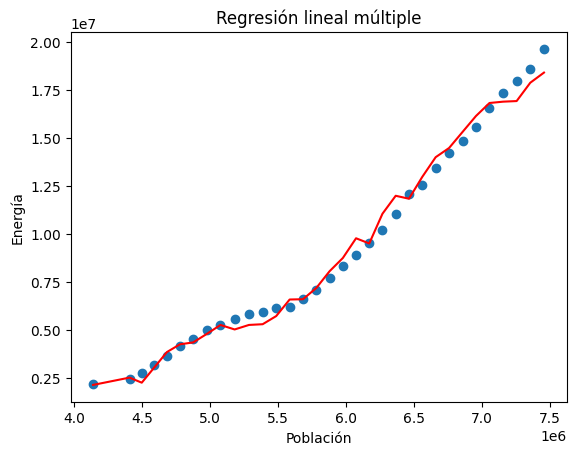

In [ ]:
# Graficar
plt.scatter(Población, Energía)
plt.plot(Población_pred, y_pred, c='red')

plt.title('Regresión lineal múltiple')
plt.xlabel('Población')
plt.ylabel('Energía')

plt.show()

In [ ]:
#Importamos está librería para no imprimr mensajes#
import warnings
warnings.filterwarnings("ignore")

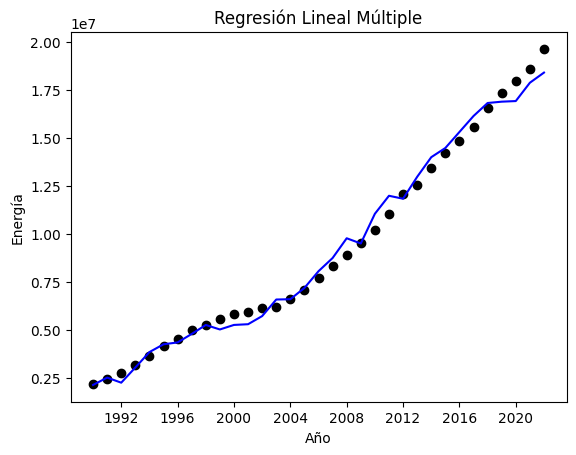

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
datos_2['Año'] = pd.to_datetime(datos_2['Año'], format='%Y')
datos_2.iloc[:,1:] = datos_2.iloc[:,1:].apply(pd.to_numeric)

X = datos_2[['Población', 'PIB', 'Inflación']]
y = datos_2['Energía']
model = LinearRegression()
model.fit(X, y)
X_future = []
y_future = []

poblacion = datos_2['Población'].iloc[-1]
pib = datos_2['PIB'].iloc[-1]
inflacion = datos_2['Inflación'].iloc[-1]
for year in range(2023, 2051):
  poblacion = poblacion + 0.011*poblacion
  pib =  pib +  pib*0.044
  inflacion = inflacion + 0.01*inflacion

  X_future.append([poblacion, pib, inflacion])
  y_pred = model.predict([X_future[-1]])[0]
  y_future.append(y_pred)

X_future = []
years = []
for year in range(2023, 2051):
  years.append(year)
  X_future.append([year, poblacion, pib, inflacion])
years = pd.to_datetime(years, format='%Y')
years = [x[0] for x in X_future]
years = pd.to_datetime(years, format='%Y')
forecast = pd.DataFrame({'Año': years, 'Predicción': y_future})
forecast = pd.DataFrame({'Año': X_future, 'Predicción': y_future})
#plt.plot(range(2023,2051), y_future, color='r')
plt.scatter(datos_2['Año'], datos_2['Energía'], color='k')
plt.plot(datos_2['Año'], model.predict(X), color='b')
plt.xlabel('Año')
plt.ylabel('Energía')
plt.title('Regresión Lineal Múltiple')
plt.show()

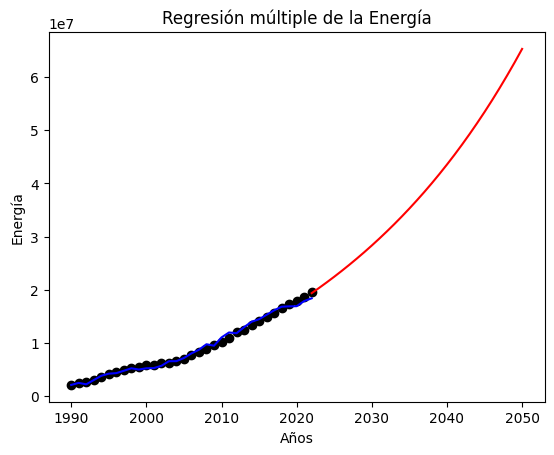

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# Carga y preparación de datos
df =datos_2
df['Año'] = pd.to_datetime(df['Año'])
df.iloc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric)
# Definición de variables
X = df[['Población','PIB','Inflación']]
y = df['Energía']
# Entrenamiento del modelo
model = LinearRegression()
model.fit(X, y)
# Predicción
poblacion = df['Población'].iloc[-1]
pib = df['PIB'].iloc[-1]
inflacion = df['Inflación'].iloc[-1]
X_future = []
y_future = []
for year in range(2022, 2051):
  poblacion = poblacion + 0.011*poblacion
  pib =  pib +  pib*0.044
  inflacion = inflacion + 0.01*inflacion
  X_future.append([poblacion, pib, inflacion])
  y_pred = model.predict([X_future[-1]])[0]
  y_future.append(y_pred)
# Gráfico
plt.scatter(df['Año'], df['Energía'], color='k')
plt.plot(df['Año'], model.predict(X), color='b')
forecast = pd.DataFrame({'Año': range(2022,2051), 'Predicción': y_future})
forecast['Año'] = pd.to_datetime(forecast['Año'], format='%Y')
plt.plot(forecast['Año'], forecast['Predicción'], color='r')
plt.title('Regresión múltiple de la Energía')
plt.xlabel('Años')
plt.ylabel('Energía')
plt.show()

In [ ]:
print('Ecuación de Regresión Múltiple:')
print('y = {:.2f} + {:.2f}*x1 + {:.2f}*x2 + {:.2f}*x3'.format(model.intercept_,
                                                             model.coef_[0],
                                                             model.coef_[1],
                                                             model.coef_[2]))

Ecuación de Regresión Múltiple:
y = -26691137.19 + 4.06*x1 + 2214.91*x2 + 60859.59*x3


Text(0.5, 1.0, 'Prónostico de la demanda de energía eléctrica para la República del Paraguay mediante RLM\n')

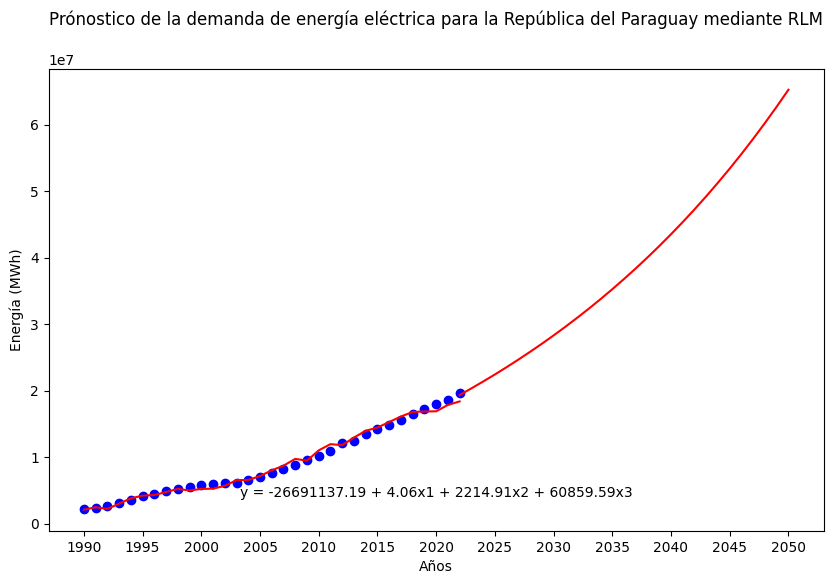

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize=(10,6))
plt.rcParams['axes.edgecolor'] = 'black'
loc = mdates.YearLocator(5)
plt.gca().xaxis.set_major_locator(loc)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

eq = '\ny = {:.2f} + {:.2f}x1 + {:.2f}x2 + {:.2f}x3'.format(model.intercept_,
                                                      model.coef_[0],
                                                      model.coef_[1],
                                                      model.coef_[2])

plt.text(0.5, 0.1, eq, horizontalalignment='center',
         verticalalignment='center', transform=plt.gca().transAxes)

loc = mdates.YearLocator(5)
plt.gca().xaxis.set_major_locator(loc)
plt.scatter(df['Año'], df['Energía'], color='blue')
plt.plot(df['Año'], model.predict(X), color='red')
plt.plot(forecast['Año'], forecast['Predicción'], color='red')
plt.ylabel('Energía (MWh)')
plt.xlabel('Años')
plt.title('Prónostico de la demanda de energía eléctrica para la República del Paraguay mediante RLM\n')

# ***1.8 Resultado RLM de Pronóstico de la Energía (1990 -2050)***

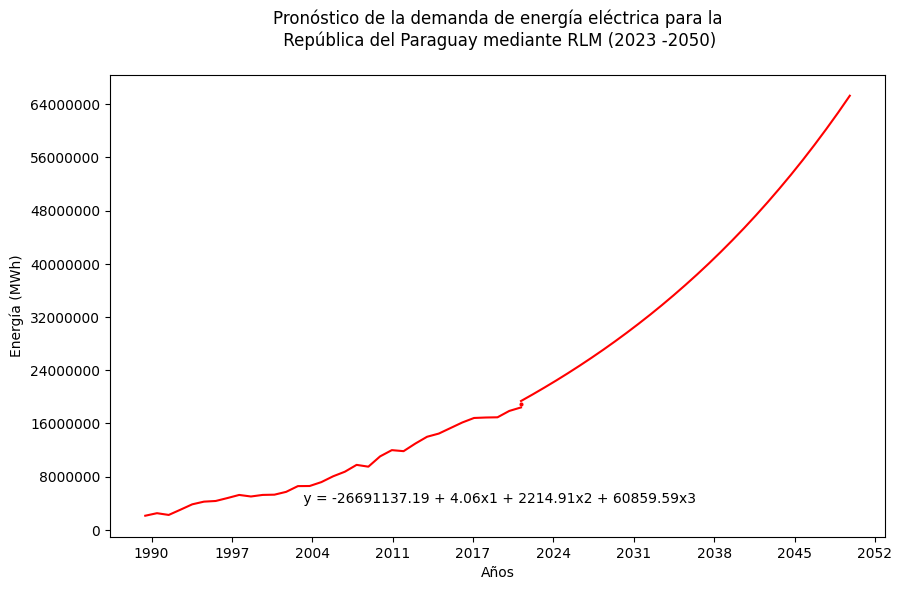

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
plt.figure(figsize=(10,6))
plt.rcParams['axes.edgecolor'] = 'black'
loc = mdates.YearLocator(5)
plt.gca().xaxis.set_major_locator(loc)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
eq = '\n y = {:.2f} + {:.2f}x1 + {:.2f}x2 + {:.2f}x3'.format(model.intercept_,
                                                      model.coef_[0],
                                                      model.coef_[1],
                                                      model.coef_[2])
plt.text(0.5, 0.1, eq, horizontalalignment='center',
         verticalalignment='center', transform=plt.gca().transAxes)
loc = mdates.YearLocator(5)
plt.gca().xaxis.set_major_locator(loc)
#plt.scatter(df['Año'], df['Energía'], color='blue')
plt.plot(df['Año'], model.predict(X), color='red')
plt.plot(forecast['Año'], forecast['Predicción'], color='red')
plt.ylabel('Energía (MWh)')
plt.xlabel('Años')
plt.title('Pronóstico de la demanda de energía eléctrica para la\n República del Paraguay mediante RLM (2023 -2050)\n')
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ticklabel_format(style='plain', axis='y')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.scatter(["2022"], [18910010], color='red', marker='.',s=15)
plt.show()

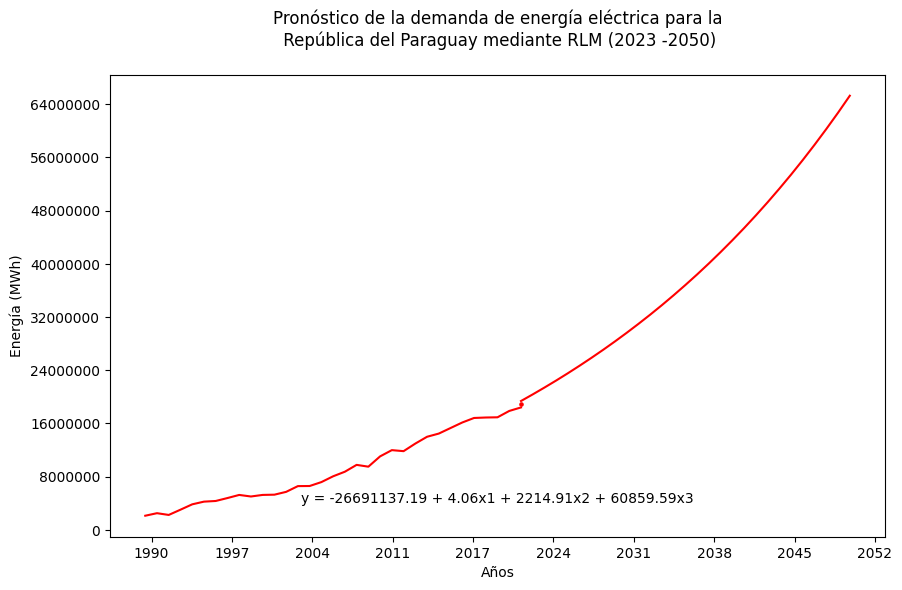

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
plt.figure(figsize=(10,6))
plt.rcParams['axes.edgecolor'] = 'black'
loc = mdates.YearLocator(5)
plt.gca().xaxis.set_major_locator(loc)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
eq = '\ny = {:.2f} + {:.2f}x1 + {:.2f}x2 + {:.2f}x3'.format(model.intercept_,
                                                      model.coef_[0],
                                                      model.coef_[1],
                                                      model.coef_[2])
plt.text(0.5, 0.1, eq, horizontalalignment='center',
         verticalalignment='center', transform=plt.gca().transAxes)
loc = mdates.YearLocator(5)
plt.gca().xaxis.set_major_locator(loc)
#plt.scatter(df['Año'], df['Energía'], color='blue')
plt.plot(df['Año'], model.predict(X), color='red')
plt.plot(forecast['Año'], forecast['Predicción'], color='red')
plt.ylabel('Energía (MWh)')
plt.xlabel('Años')
plt.title('Pronóstico de la demanda de energía eléctrica para la\n República del Paraguay mediante RLM (2023 -2050)\n')
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ticklabel_format(style='plain', axis='y')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.scatter(["2022"], [18910010], color='red', marker='.',s=21)
plt.show()


***OBSERVACIÓN: Se considera las siguientes premisas, la población aumenta en un 1.1% anualmente, el PIB se incrementa en un 4,4 % anual, y la inflación estimado en un 1% ."***


In [ ]:
import pandas as pd
# Generar la tabla
print('Valores de Energía predichos:')
tabla = []
for i, y in enumerate(y_future, start=2023):
  print(f'{i}: {y:.2f}')
  tabla.append([i, y])
tabla = pd.DataFrame(tabla, columns=['Año', 'Energía'])
# Guardar la tabla en un archivo Excel
tabla.to_excel("Tabla_RLM.xlsx", index=False)
# Descargar el archivo Excel
from google.colab import files
files.download("Tabla_RLM.xlsx")

Valores de Energía predichos:
2023: 19365931.95
2024: 20361961.08
2025: 21390500.60
2026: 22452856.71
2027: 23550391.71
2028: 24684526.47
2029: 25856742.98
2030: 27068587.02
2031: 28321670.99
2032: 29617676.74
2033: 30958358.71
2034: 32345547.04
2035: 33781150.93
2036: 35267162.04
2037: 36805658.17
2038: 38398807.00
2039: 40048870.02
2040: 41758206.68
2041: 43529278.61
2042: 45364654.20
2043: 47267013.17
2044: 49239151.53
2045: 51283986.67
2046: 53404562.63
2047: 55604055.72
2048: 57885780.26
2049: 60253194.69
2050: 62709907.86
2051: 65259685.63


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **2. Análisis de correlaciones de las variables**

La matriz de correlación muestra el coeficiente de correlación entre cada par de variables. El coeficiente de correlación mide la relación lineal entre dos variables y puede tomar valores entre -1 y 1.

Un coeficiente de correlación de -1 indica una correlación negativa perfecta:
*Cuando una variable aumenta la otra disminuye.*
Un coeficiente de 0 indica que no hay correlación lineal.
Un coeficiente de 1 indica una correlación positiva perfecta. *Cuando una variable aumenta la otra también aumenta.*

1.  Valores entre 0 y 0.3 (o -0.3 y 0) indican correlación débil.
2.  Valores entre 0.3 y 0.7 (-0.3 y -0.7) indican correlación moderada.
3.   Valores superiores a 0.7 (o inferiores a -0.7) indican una correlación fuerte.





***2.1 Matriz de Correlacón de Pearson***

# **2.2 Análisis de correlación entre variables**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

datos_3 = pd.read_excel("/content/Correlación_horaria.xlsx")

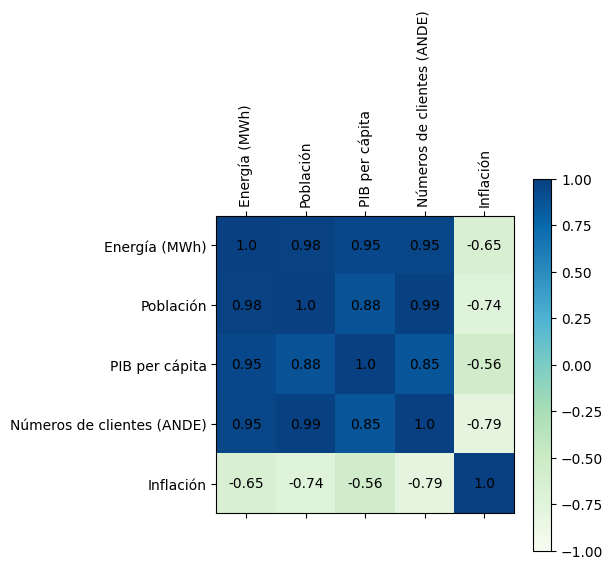

In [ ]:
matriz = datos_2.corr() # -1 (existe una relación fuerte)  0   1 (existe una relación fuerte)
plt.matshow(matriz, cmap="GnBu", vmin=-1, vmax=1)
plt.xticks(range(5), datos_2.columns, rotation=90)
plt.yticks(range(5), datos_2.columns)

for i in range(len(matriz.columns)):
    for j in range(len(matriz.columns)):
        plt.text(i, j, round(matriz.iloc[i, j], 2),
                 ha="center", va="center")
plt.colorbar()
plt.show()

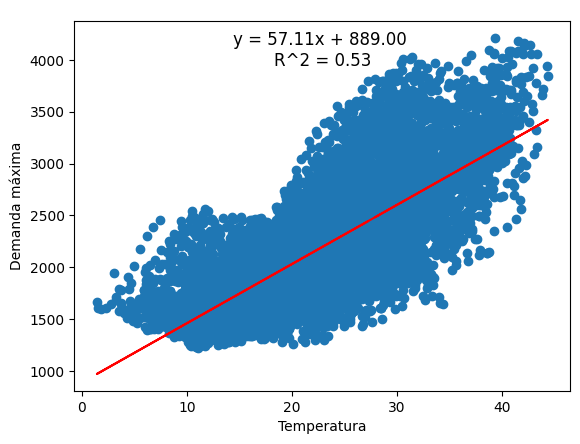

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
x = datos_3["Temperatura"]
y = datos_3["Demanda máxima horaria"]
# Cálculos
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# Gráfico de dispersión
plt.scatter(x, y)
# Graficar recta de regresión
y_pred = intercept + slope * x
plt.plot(x, y_pred, color='red')
# Mostrar ecuación y R^2
plt.text(0.5, 0.95, "\ny = {:.2f}x + {:.2f} \nR^2 = {:.2f}".format(slope, intercept, r_value**2),
         fontsize=12, transform=plt.gca().transAxes,
         horizontalalignment='center',
         verticalalignment='center')

plt.xlabel("Temperatura")
plt.ylabel("Demanda máxima")
plt.show()

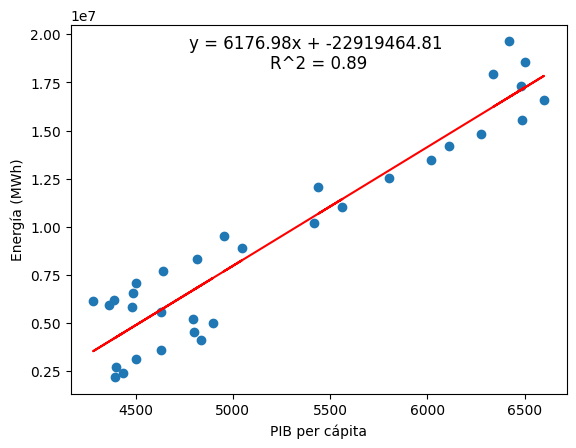

In [ ]:
x = datos["PIB per cápita"]
y = datos["Energía (MWh)"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.scatter(x, y)
y_pred = intercept + slope * x
plt.plot(x, y_pred, color='red')
plt.text(0.5, 0.95, "\ny = {:.2f}x + {:.2f} \nR^2 = {:.2f}".format(slope, intercept, r_value**2),
         fontsize=12, transform=plt.gca().transAxes,
         horizontalalignment='center',
         verticalalignment='center')
plt.xlabel("PIB per cápita")
plt.ylabel("Energía (MWh)")
plt.show()

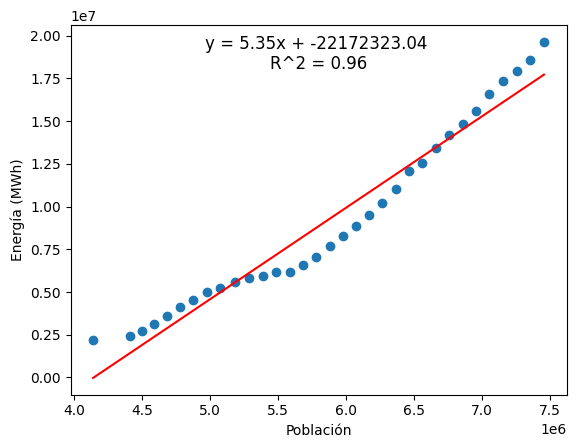

In [ ]:
x = datos["Población"]
y = datos["Energía (MWh)"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.scatter(x, y)
y_pred = intercept + slope * x
plt.plot(x, y_pred, color='red')
plt.text(0.5, 0.95, "\ny = {:.2f}x + {:.2f} \nR^2 = {:.2f}".format(slope, intercept, r_value**2),
         fontsize=12, transform=plt.gca().transAxes,
         horizontalalignment='center',
         verticalalignment='center')
plt.xlabel("Población")
plt.ylabel("Energía (MWh)")
plt.show()

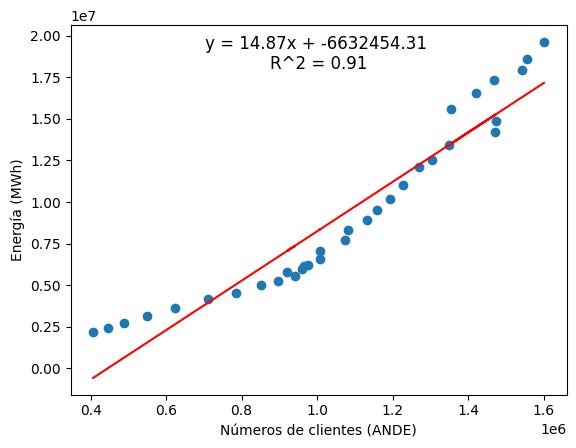

In [ ]:
x = datos["Números de clientes (ANDE)"]
y = datos["Energía (MWh)"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.scatter(x, y)
y_pred = intercept + slope * x
plt.plot(x, y_pred, color='red')
plt.text(0.5, 0.95, "\ny = {:.2f}x + {:.2f} \nR^2 = {:.2f}".format(slope, intercept, r_value**2),
         fontsize=12, transform=plt.gca().transAxes,
         horizontalalignment='center',
         verticalalignment='center')
plt.xlabel("Números de clientes (ANDE)")
plt.ylabel("Energía (MWh)")
plt.show()

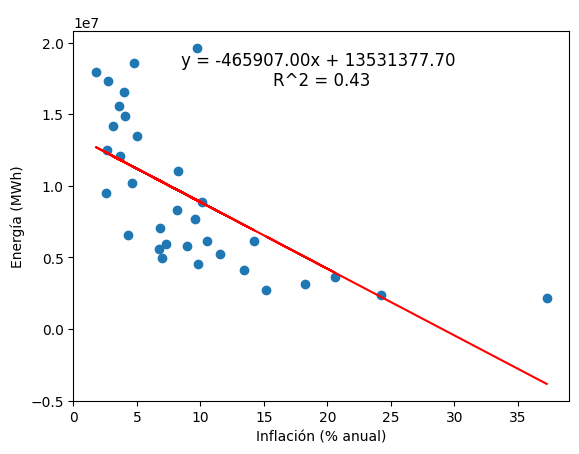

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = datos_2["Inflación"]
y = datos_2["Energía (MWh)"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.scatter(x, y)
y_pred = intercept + slope * x
plt.plot(x, y_pred, color='red')
plt.text(0.5, 0.95, "\n\ny = {:.2f}x + {:.2f} \nR^2 = {:.2f}".format(slope, intercept, r_value**2),
         fontsize=12, transform=plt.gca().transAxes,
         horizontalalignment='center',
         verticalalignment='center')
plt.xlabel("Inflación (% anual)")
plt.ylabel("Energía (MWh)")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

datos_2 = pd.read_excel("/content/Demanda máxima horaria_DICIEMBRE.xlsx")

***2.3 Análisis de Correlación de Pearson de la demanda máxima horaria 2022 y la temperatura***

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

datos_3 = pd.read_excel("/content/Temperatura horaria 2022.xlsx")

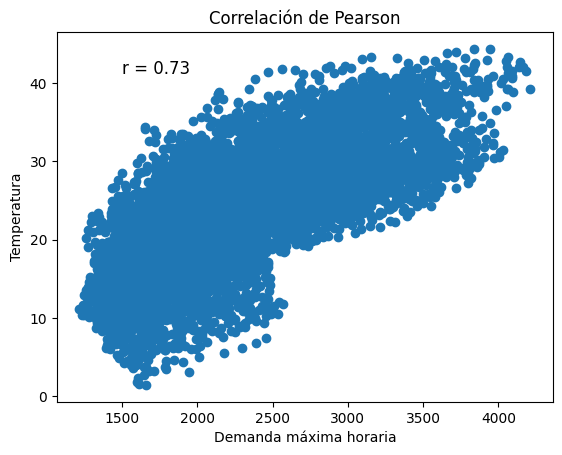

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = datos_2["Demanda máxima"]
y = datos_3["Temperatura"]

# Calcular correlación de Pearson
corr, p_value = stats.pearsonr(x, y)

# Gráfico de dispersión
plt.scatter(x, y)

# Mostrar valor de correlación
plt.text(0.2, 0.9, "r = {:.2f}".format(corr), fontsize=12, transform=plt.gca().transAxes,
         horizontalalignment='center', verticalalignment='center')

plt.xlabel("Demanda máxima horaria")
plt.ylabel("Temperatura")
plt.title("Correlación de Pearson")
plt.show()

In [ ]:
datos_4 = pd.read_excel("/content/matriz.xlsx")

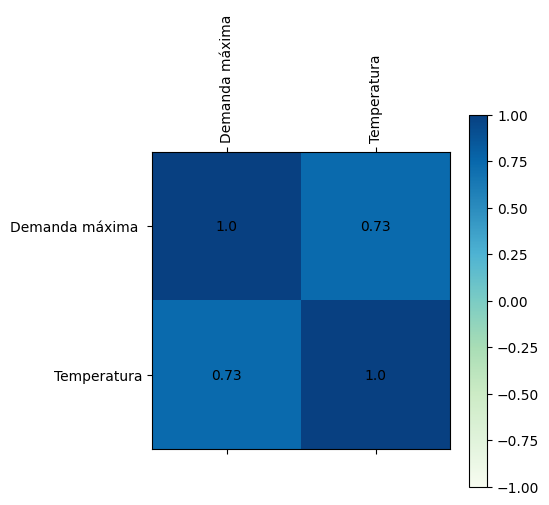

In [ ]:
matriz_4 = datos_4.corr() # -1 (existe una relación fuerte)  0   1 (existe una relación fuerte)
plt.matshow(matriz_4, cmap="GnBu", vmin=-1, vmax=1)
plt.xticks(range(2), datos_4.columns, rotation=90)
plt.yticks(range(2), datos_4.columns)

for i in range(len(matriz_4.columns)):
    for j in range(len(matriz_4.columns)):
        plt.text(i, j, round(matriz_4.iloc[i, j], 2),
                 ha="center", va="center")
plt.colorbar()
plt.show()

In [ ]:
datos_4.describe()

,Demanda máxima,Temperatura
count,8760.000000,8760.000000
mean,2219.577896,23.298498
std,589.372130,7.522816
min,1218.000000,1.450000
25%,1790.750000,18.060000
50%,2099.000000,23.150000
75%,2572.000000,28.370000
max,4212.000000,44.350000


In [ ]:
#FIN DEL ANÁLISIS